### Iris Flowers Classification Project 

In this project, we will be working on Iris dataset to classify the flowers species, we will follow the whole machine learning project lifecycle and also we will deploy it using flask. Below is the whole outline that we will be following. 

- Loading the imporatant libraries  
- Loading and understanding the Iris data 
- Exploring the data 
- Visualizaing the data  
    - Checking if our data is skewed or not using countplot.  
    - We will plot the grids for every species. 
- Checking Null Values
- Dividing the data 
- Model Development 
    - Using Lr, SVM, Decision Tree, Gradient Boosting 
    - Calculating loss  
    - Training on every algorithm 
    - Choosing the best 
- Saving the Model  

In [26]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

import warnings 
warnings.filterwarnings('ignore') 

from sklearn.datasets import load_iris

In [46]:

from sklearn.utils import shuffle

# Shuffle the data
shuffled_data = shuffle(data, random_state=42)

# Display the first few rows of shuffled data
display(shuffled_data.head())
# Separate features (X) and target labels (y) after shuffling
X = shuffled_data.drop("Species", axis=1)
y = shuffled_data["Species"]
# data = pd.DataFrame(X,columns=iris.feature_names) 
# data["Species"] = y 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [47]:
data.shape

(150, 5)

In [48]:
data["Species"].unique()

array([0, 1, 2])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [50]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: ylabel='count'>

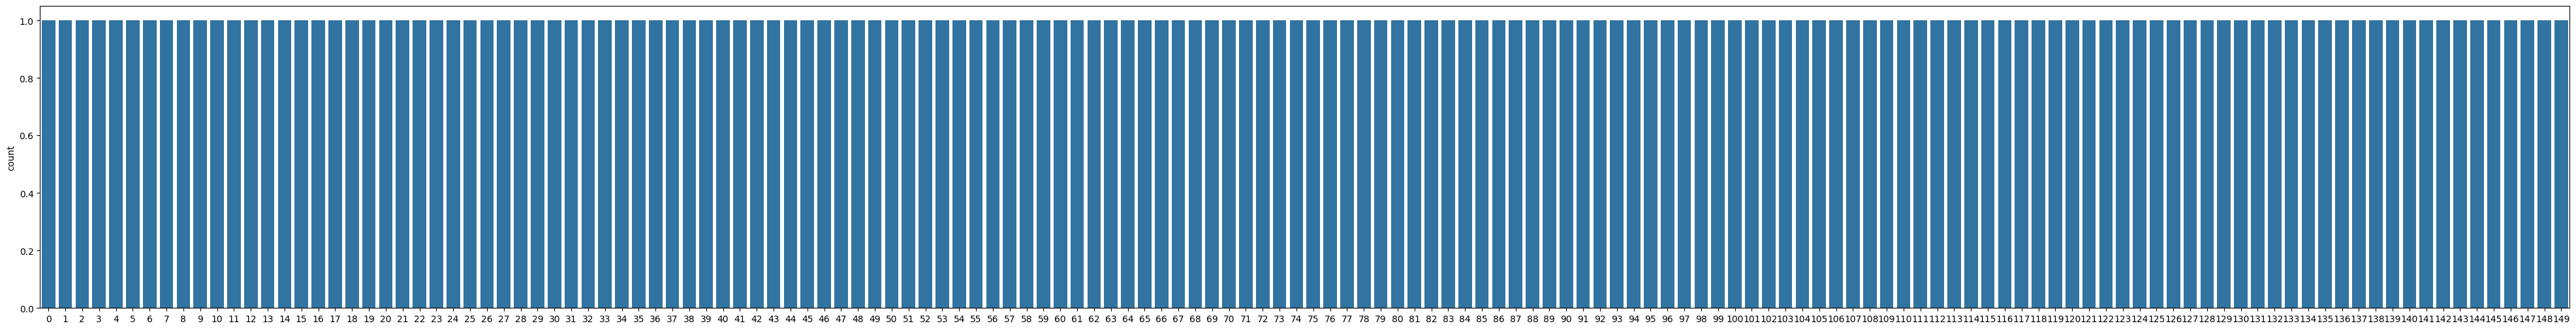

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(50, 6))
sns.countplot(data["Species"])

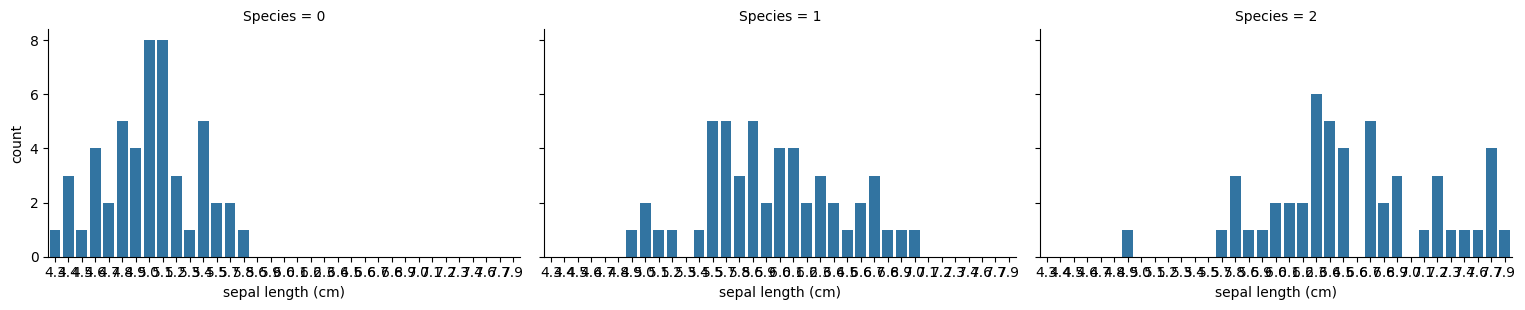

In [52]:
grid = sns.FacetGrid(data, col='Species', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'sepal length (cm)')

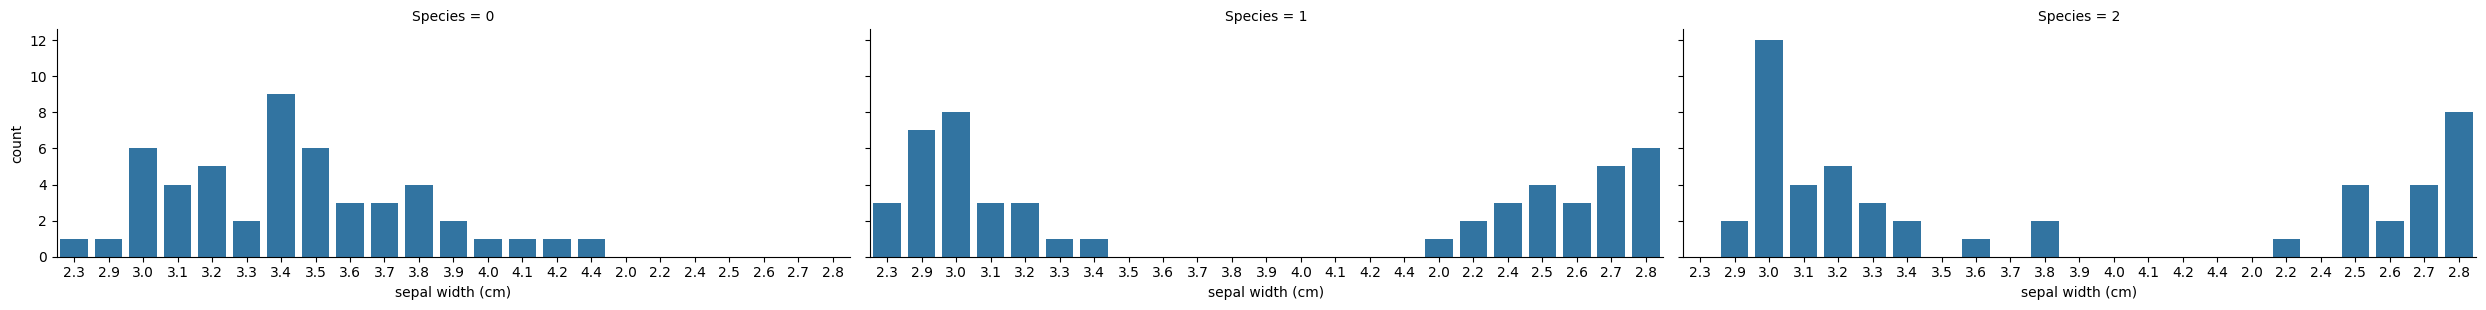

In [53]:
grid = sns.FacetGrid(data, col='Species', height=3.2, aspect=2.6) 
grid.map(sns.countplot, 'sepal width (cm)')

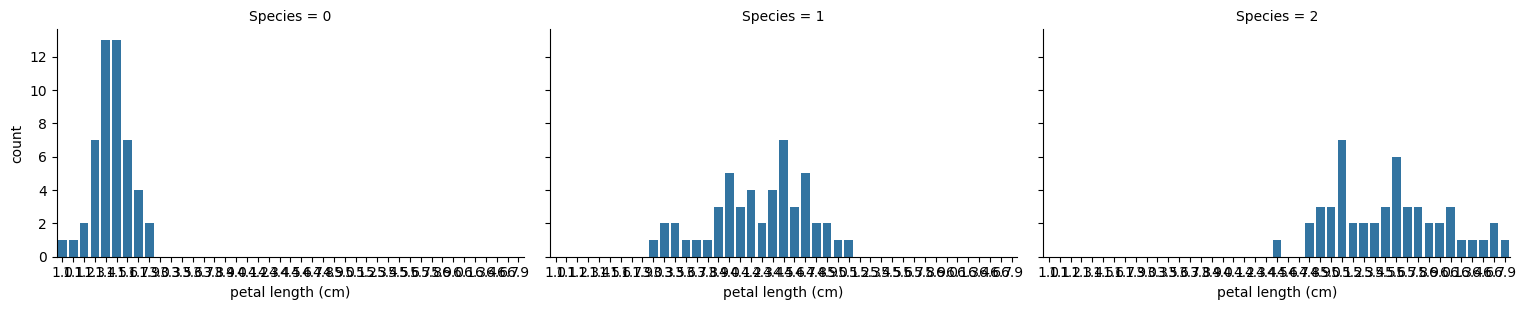

In [54]:
grid = sns.FacetGrid(data, col='Species', height=3.2, aspect=1.6) 
grid.map(sns.countplot, 'petal length (cm)')

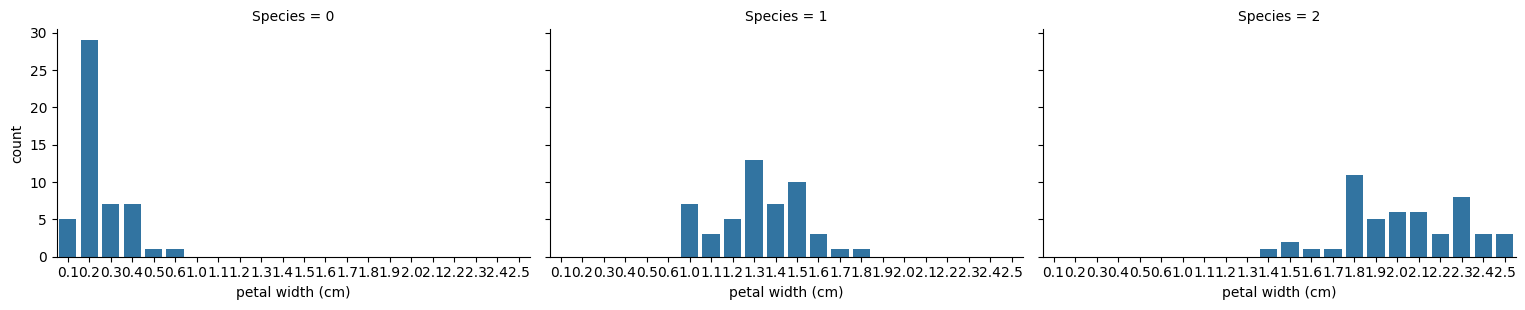

In [55]:
grid = sns.FacetGrid(data, col='Species', height=3.2, aspect=1.6) 
grid.map(sns.countplot, 'petal width (cm)')

In [56]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [65]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3, random_state=42) 

In [66]:
print(X_train.shape) 
print(Y_train.shape) 
print(X_test.shape) 
print(Y_test.shape) 

(105, 4)
(105,)
(45, 4)
(45,)


## Testing other algorithms using SKlearn Models

### Before Hyper parameter tuning

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score 
# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}


'''
# None: Returns the score for each class separately.
# 'micro': Computes the metric globally by counting the total true positives, false negatives, and false positives across all classes and then calculating the metric.
# 'macro': Calculates the metric for each class independently and then averages the results, giving equal weight to each class regardless of its size.
# 'weighted': Calculates the metric for each class independently and then averages the results, weighted by the number of true instances for each class.
'''
# Create an empty dictionary to store results for each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred,average='macro')
    recall = recall_score(Y_test, pred,average='macro')
    # Store the results for the model
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

# Create DataFrame for results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
print(results_df)



                     Accuracy  Precision    Recall
Logistic Regression  0.977778   0.979167  0.977778
Decision Tree        0.955556   0.960784  0.955556
Random Forest        0.977778   0.979167  0.977778
Gradient Boosting    0.955556   0.960784  0.955556
SVC                  0.977778   0.979167  0.977778
KNN                  0.977778   0.979167  0.977778
XGBoost              0.955556   0.960784  0.955556


### After Hyper Parameter Tuning

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Define hyperparameter grids for each classification model
models_grid = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10]},
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]},
    "SVC": {"kernel": ['rbf', 'sigmoid'], "C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
    "KNN": {"n_neighbors": list(range(5, 11)), "weights": ['uniform', 'distance']},
    "XGBoost": {"n_estimators": [100, 200, 1000], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]}
}


In [69]:


#final results stored here
best_results = {}

# Train and evaluate models with variations
for name, params_dict in models_grid.items():
    no_of_params = len(params_dict)
    # Get keys and values from param_grid_rf
    param_keys = list(params_dict.keys())
    param_values = list(params_dict.values())

    # Generate all combinations of hyperparameters
    import itertools
    param_combinations = list(itertools.product(*param_values))

    # Initialize best accuracy, precision, and recall for the model
    best_accuracy = 0.0
    best_precision = 0.0
    best_recall = 0.0

    # Initialize best hyperparameters for the model
    best_hyperparameters = None

    # Train and evaluate models with variations
    for params in param_combinations:
        # Set hyperparameters
        hyperparameters = {param_keys[i]: params[i] for i in range(len(param_keys))}
        models[name].set_params(**hyperparameters)
        # Train the model
        models[name].fit(X_train, Y_train)
        # Make predictions
        pred = models[name].predict(X_test)
        # Calculate evaluation metrics
        accuracy = accuracy_score(Y_test, pred)
        precision = precision_score(Y_test, pred,average='macro')
        recall = recall_score(Y_test, pred,average='macro')
        # Check if current metrics are better than the previous best
        if accuracy > best_accuracy:
            # Update best metrics and hyperparameters
            best_accuracy = accuracy
            best_precision = precision
            best_recall = recall
            best_hyperparameters = hyperparameters

    # Store the best results for the model
    best_results[name] = {'Model': name, 
                          'Hyperparameters': best_hyperparameters, 
                          'Accuracy': best_accuracy,
                          'Precision': best_precision,
                          'Recall': best_recall}

# Create DataFrame from the best results dictionary
best_results_df = pd.DataFrame(list(best_results.values()))

# Display
display(best_results_df)


,Model,Hyperparameters,Accuracy,Precision,Recall
0,Logistic Regression,{'C': 1},0.977778,0.979167,0.977778
1,Decision Tree,"{'max_depth': None, 'min_samples_split': 10}",0.977778,0.979167,0.977778
2,Random Forest,"{'n_estimators': 100, 'max_depth': None, 'min_...",0.977778,0.979167,0.977778
3,Gradient Boosting,"{'n_estimators': 100, 'learning_rate': 0.01, '...",0.955556,0.960784,0.955556
4,SVC,"{'kernel': 'rbf', 'C': 1, 'gamma': 'scale'}",0.977778,0.979167,0.977778
5,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.977778,0.979167,0.977778
6,XGBoost,"{'n_estimators': 100, 'learning_rate': 0.1, 'm...",0.977778,0.979167,0.977778


Saving the model

In [43]:
# import joblib 

# joblib.dump(model_name, 'model_name_as.pkl') 

# grad = joblib.load('model_name_as.pkl')